<a href="https://colab.research.google.com/github/tbw875/Dashboard/blob/main/nwpc_2023_player_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from time import sleep
import ipywidgets as widgets
from IPython.display import display, clear_output
sns.set_style("whitegrid")
from matplotlib.ticker import FuncFormatter

In [56]:
def custom_formatter(x, _):
  """
  Formatter for changing the scores for Seaborn
  """
  if x < 1e3:
    return f"{x:.0f}"
  elif x < 1e6:
    return f"{x*1e-3:.0f}K"
  else:
    return f"{x*1e-6:.0f}M"

In [47]:
game_ids = list(range(101,111))

dfs = []

game_names = ['ap', 'bksor', 'br', 'con', 'di', 'exc', 'foo', 'hoop', '007', 'mc']


In [48]:
base_url = 'https://www.neverdrains.com/nwpc2023/playerIndex.php?disp=game&sel=Open&game={}'

for game_id in game_ids:
    # Form the URL using base_url
    url = base_url.format(game_id)
    page = requests.get(url)
    soup = BeautifulSoup(page.content, 'html.parser')

    table = soup.find('table')

    if table:
        df = pd.read_html(str(table))[0]
        dfs.append(df)

    sleep(2)


game_dataframes = {game: df for game, df in zip(game_names, dfs)}


In [69]:
# Building a dropdown player selection

button = widgets.Button(description="Run")

all_players = pd.concat(game_dataframes.values())['Name'].unique()
dropdown = widgets.Dropdown(
    options=all_players,
    description='Player:',
    disabled=False,
)



In [73]:
def plot_for_player(player):
    for game, df in game_dataframes.items():
        plt.figure(figsize=(10, 6))
        sns.histplot(df['Score'], kde=True, bins=30, label='All players')

        player_scores = df[df['Name'] == player]['Score']
        for score in player_scores:
            plt.axvline(x=score, color='green', linestyle='--', label=f"{player}'s score" if 'score' not in [l.get_label() for l in plt.gca().get_lines()] else "")

        plt.title(f'Distribution of Scores for {game.upper()}')
        plt.xlabel('Score')
        plt.ylabel('Number of Players')
        ax = plt.gca()
        ax.xaxis.set_major_formatter(FuncFormatter(custom_formatter))
        plt.legend()
        plt.show()


In [66]:
def on_dropdown_change(change):
    if change['name'] == 'value' and (change['new'] != change['old']):
        clear_output(wait=True)
        display(dropdown)
        selected_player = change['new']
        plot_for_player(selected_player)

dropdown.observe(on_dropdown_change)


In [70]:
def on_button_click(button):
  selected_player = dropdown.value
  clear_output(wait=True)
  display(dropdown, button)
  plot_for_player(selected_player)

In [71]:
button.on_click(on_button_click)

Dropdown(description='Player:', index=54, options=('Richie Terry', 'Donald Warren', 'Lonnie Langford', 'Jason …

Button(description='Run', style=ButtonStyle())

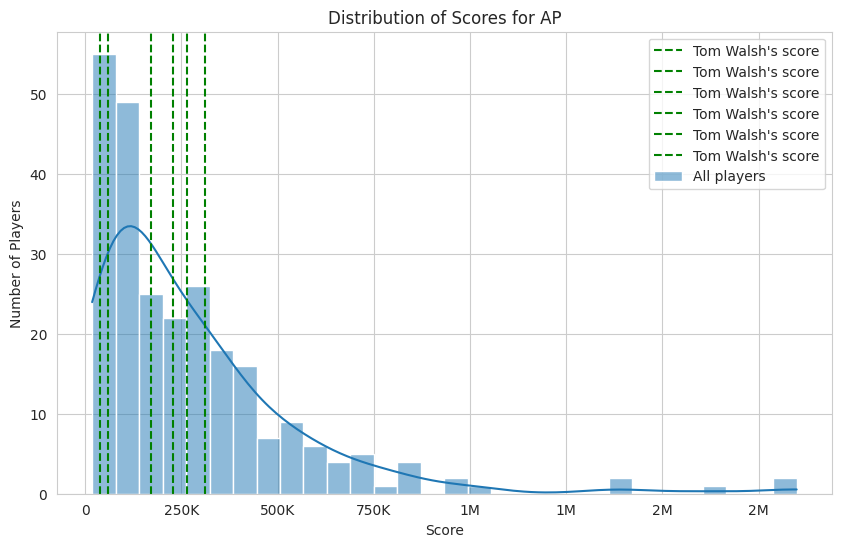

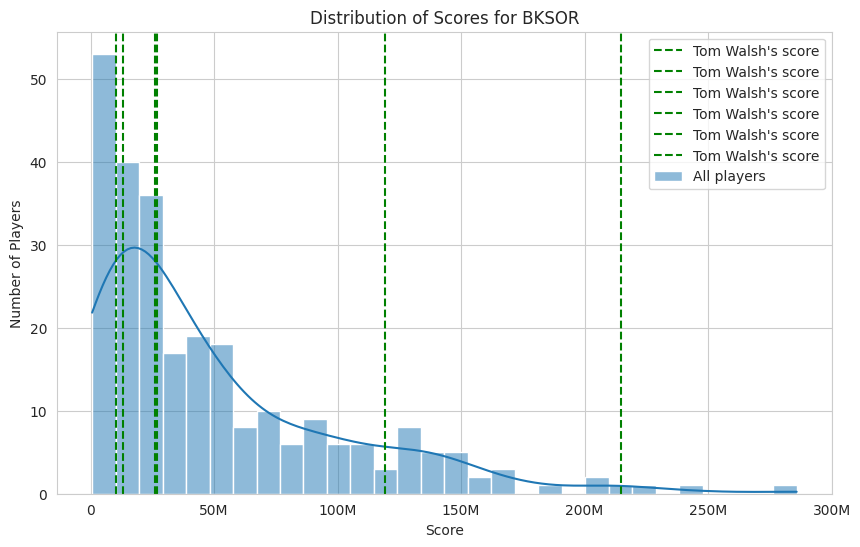

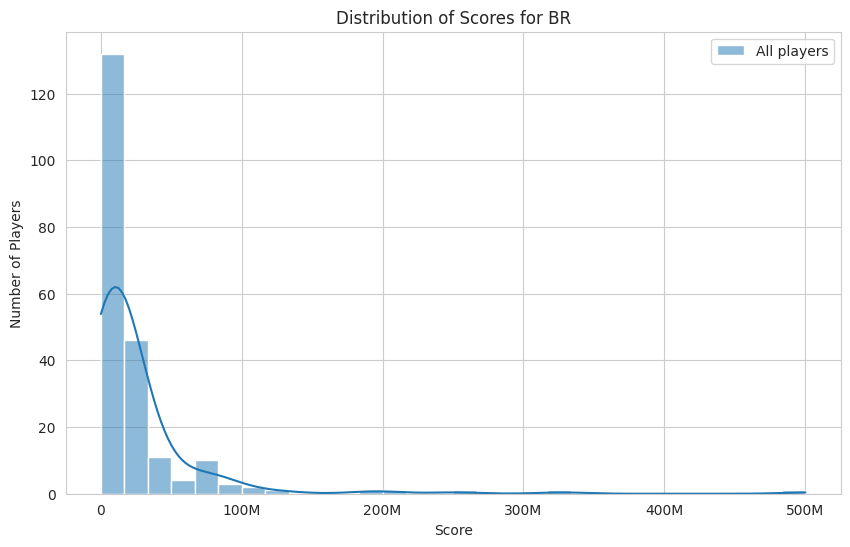

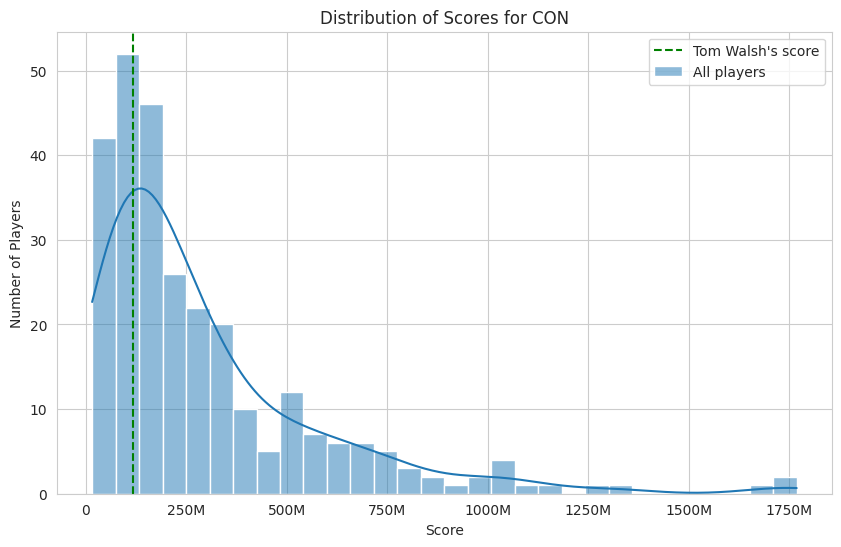

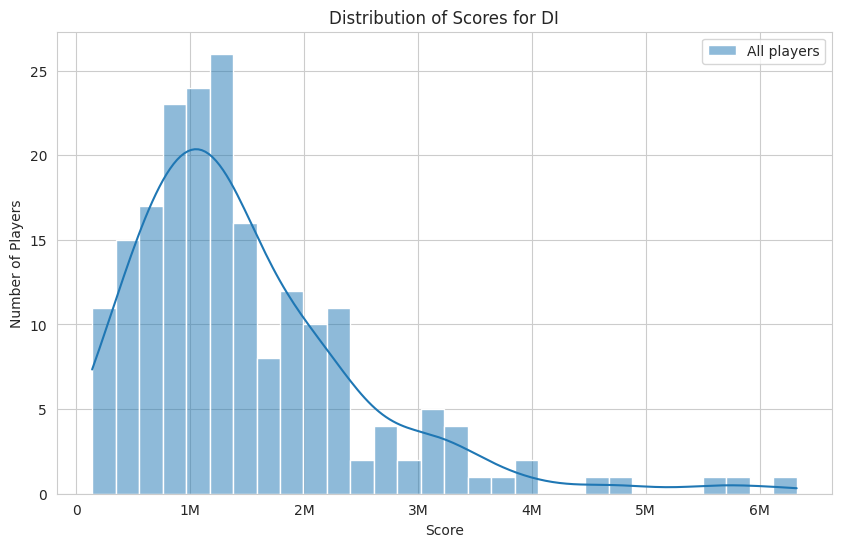

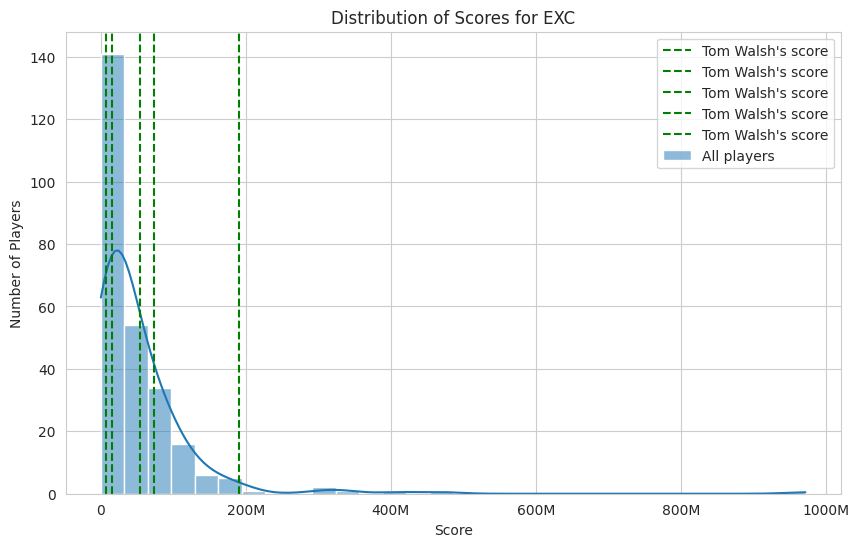

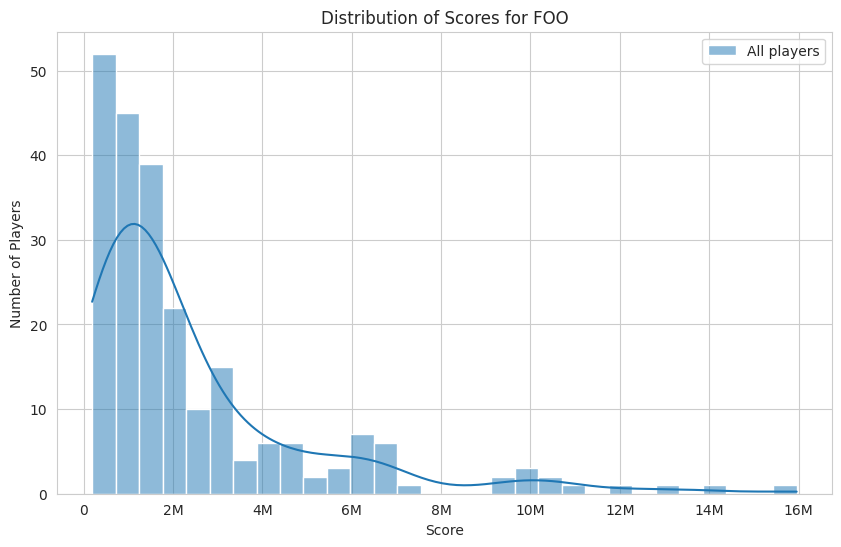

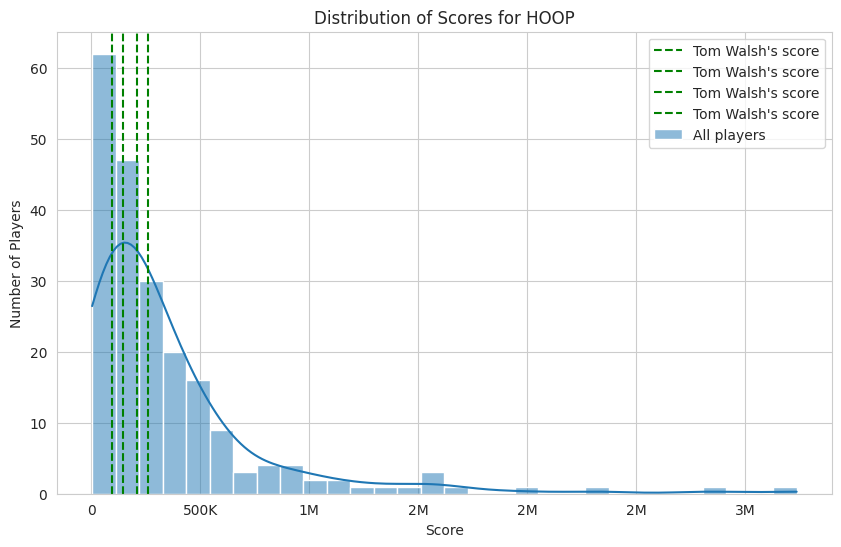

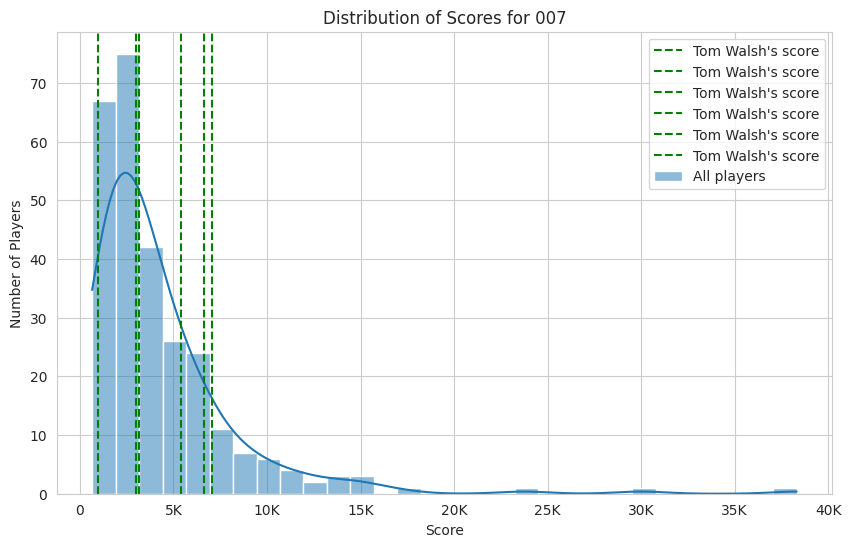

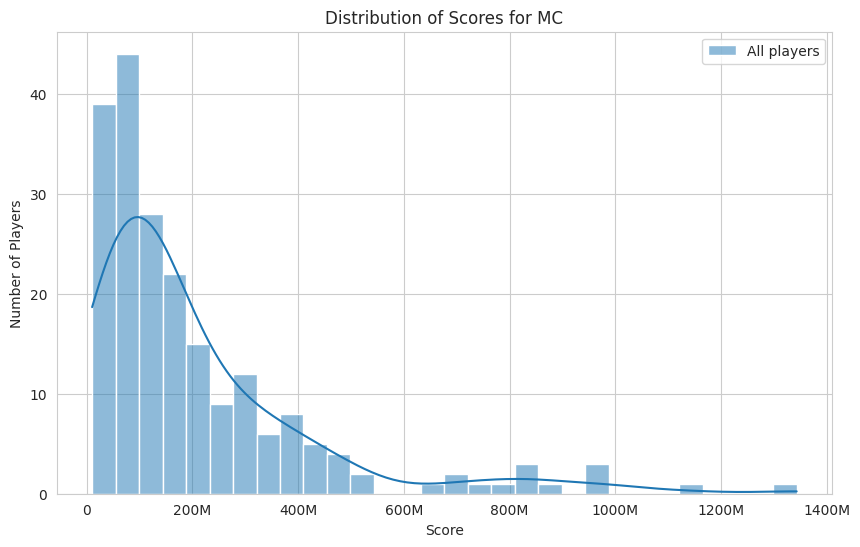

In [72]:
display(dropdown,button)